In [14]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm
import numpy as np
import matplotlib.patches as patches
import sys
sys.path.append('..')

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# change working directory to project root
while os.getcwd().split('/')[-1] != 'imodels-experiments':
    os.chdir('..')

from config.tao.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
import viz

print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num_datasets 4 9


In [18]:
# run comparison aggregations
!python3 02_aggregate_results.py

  0%|                                                    | 0/22 [00:00<?, ?it/s]02_aggregate_results.py:53: UserWarning: bad complexity range
  warnings.warn(f'bad complexity range')
100%|███████████████████████████████████████████| 22/22 [00:00<00:00, 63.41it/s]
successfully processed 11 / 22 individual seeds
100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 25.18it/s]
successfully processed 11 / 11 averaged seeds


# overarching plots

  0%|                                                                                                                                                                               | 0/4 [00:00<?, ?it/s]/Users/chandan/venvs/imodels/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/chandan/venvs/imodels/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/chandan/venvs/imodels/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
 25%|█████████████████████████████████████████▊                                                                                                                             | 1/4 [00:00<00:00,  6.31it/s]/Users/chandan/venvs/imodels/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283

tried HSTAO but valid keys are dict_keys(['CART', 'FIGS', 'TAO'])


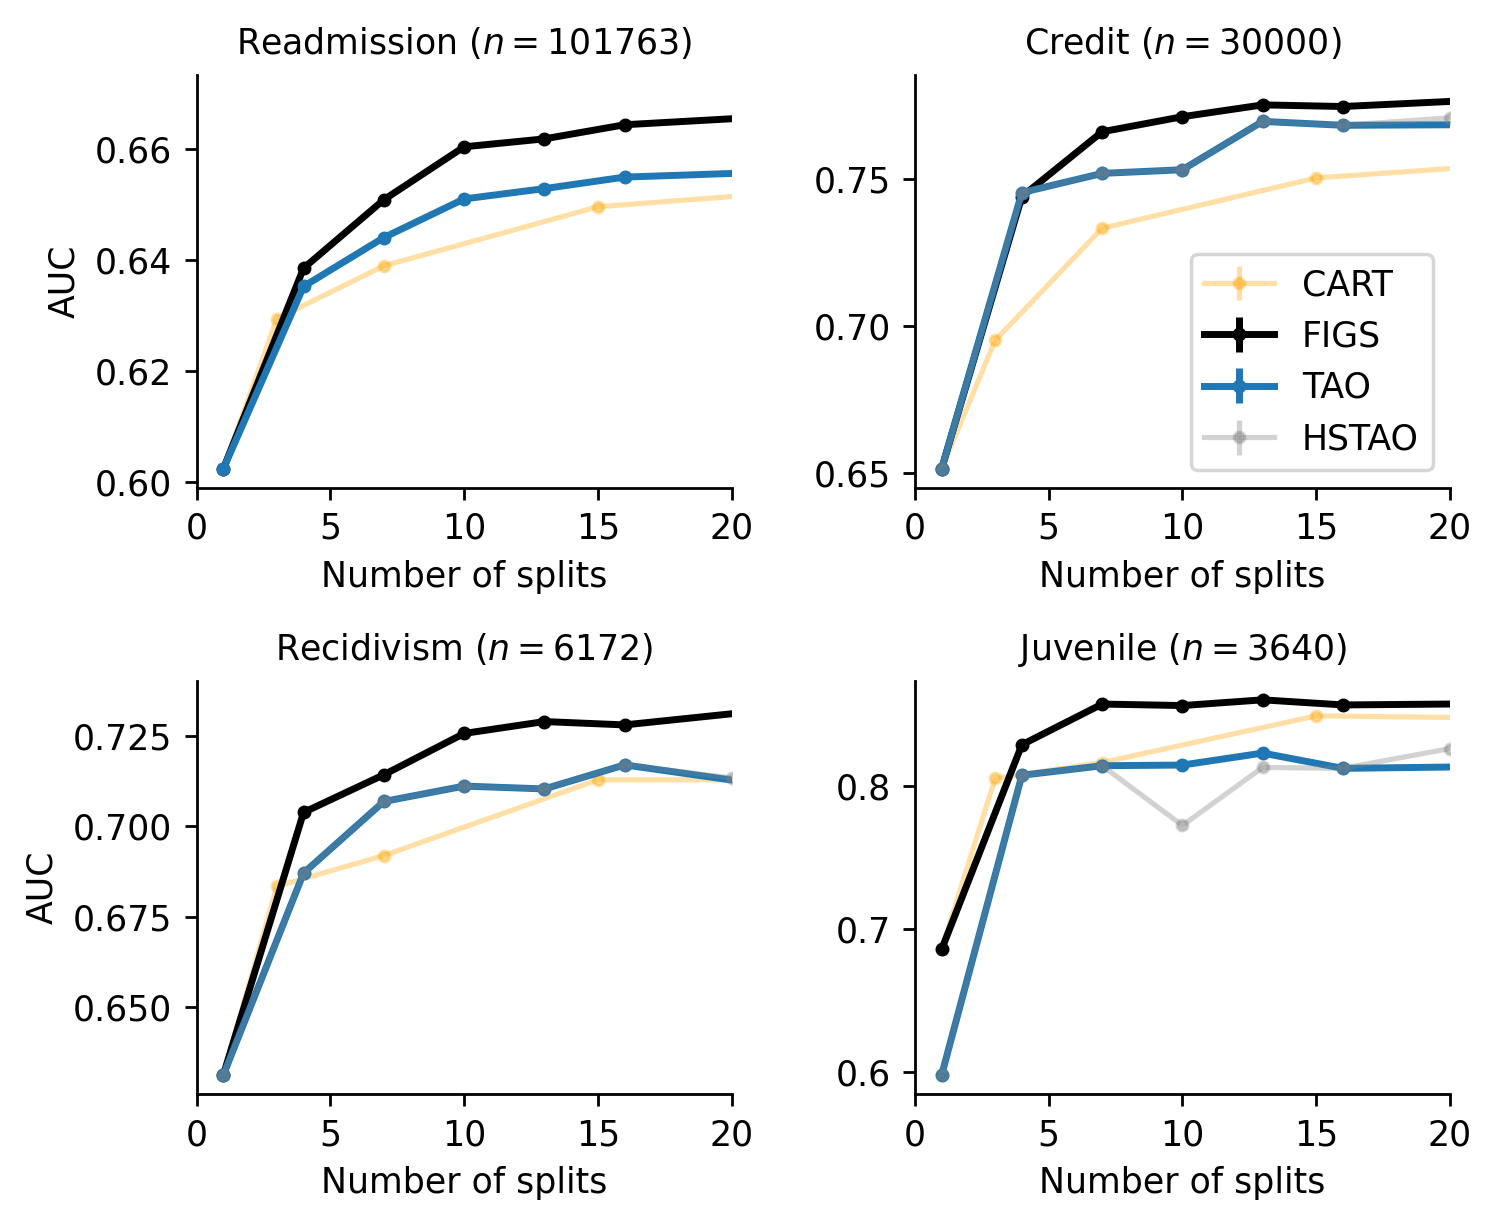

In [22]:
viz.plot_comparisons(metric='rocauc', datasets=DATASETS_CLASSIFICATION[::-1][:4],
                models_to_include=['CART', 'FIGS', 'TAO', 'HSTAO'], # GBDT-2
#                 models_to_include_dashed=['RandomForest'],
                    color_legend=False,
                config_name='tao',
                eps_legend_sep=0.01,  
                C=2,
                    )
#                 xlim=20)

In [ ]:
viz.plot_comparisons(metric='r2', datasets=DATASETS_REGRESSION[::-1][:9],
                models_to_include=['SAPS', 'CART_(MSE)', 'CART_(MAE)','Rulefit', 'GBDT-1'], # 'GBDT-2'
                models_to_include_dashed=['RandomForest'],                     
                save_name='regression_saps',
                color_legend=True,
                eps_legend_sep=0.07) # neg_mean_squared_error, r2

In [17]:
# viz.plot_comparisons(metric='rocauc', datasets=DATASETS_CLASSIFICATION[::-1][:6],
#                 models_to_include=['SAPS', 'SAPS_(Include_Linear)', 'SAPS_(Reweighted)'],
#                 save_name='classification_variants') # neg_mean_squared_error, r2

In [18]:
# make_comparison_grid(metric='r2', datasets=DATASETS_REGRESSION[::-1][:9],
#                 models_to_include=['SAPS', 'SAPS_(Include_Linear)', 'SAPS_(Reweighted)'],
#                 save_name='regression_variants') # neg_mean_squared_error, r2

In [ ]:
viz.plot_comparisons(metric='r2', datasets=['friedman1'],
                     models_to_include=['SAPS', 'CART', 'Rulefit', 'C45', 'CART_(MSE)', 'CART_(MAE)'],
                     save_name='classification')

# classification

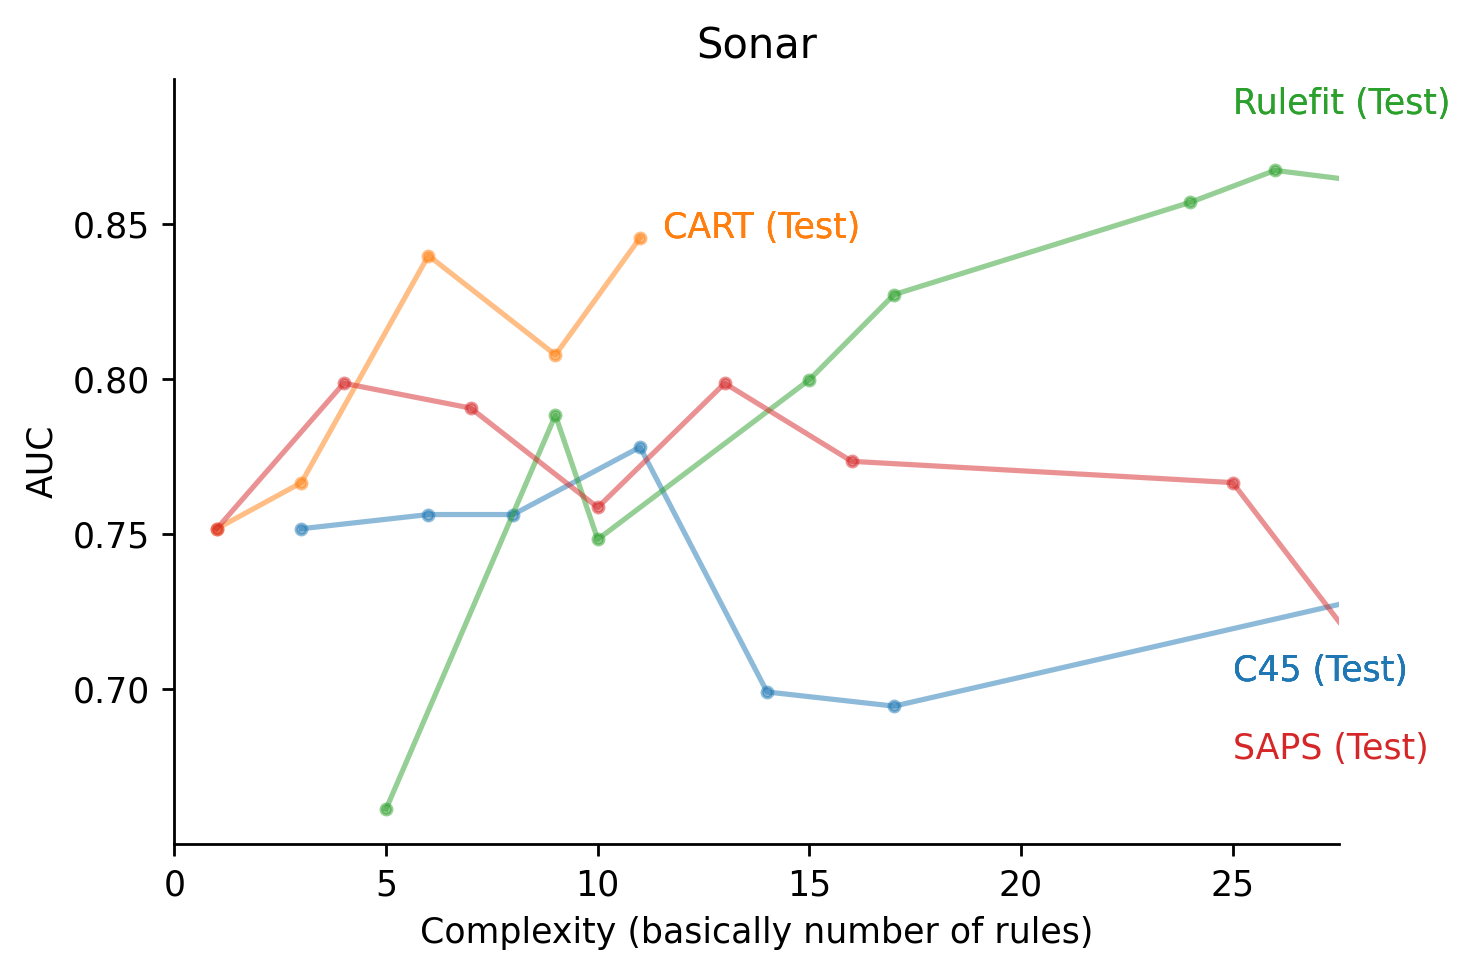

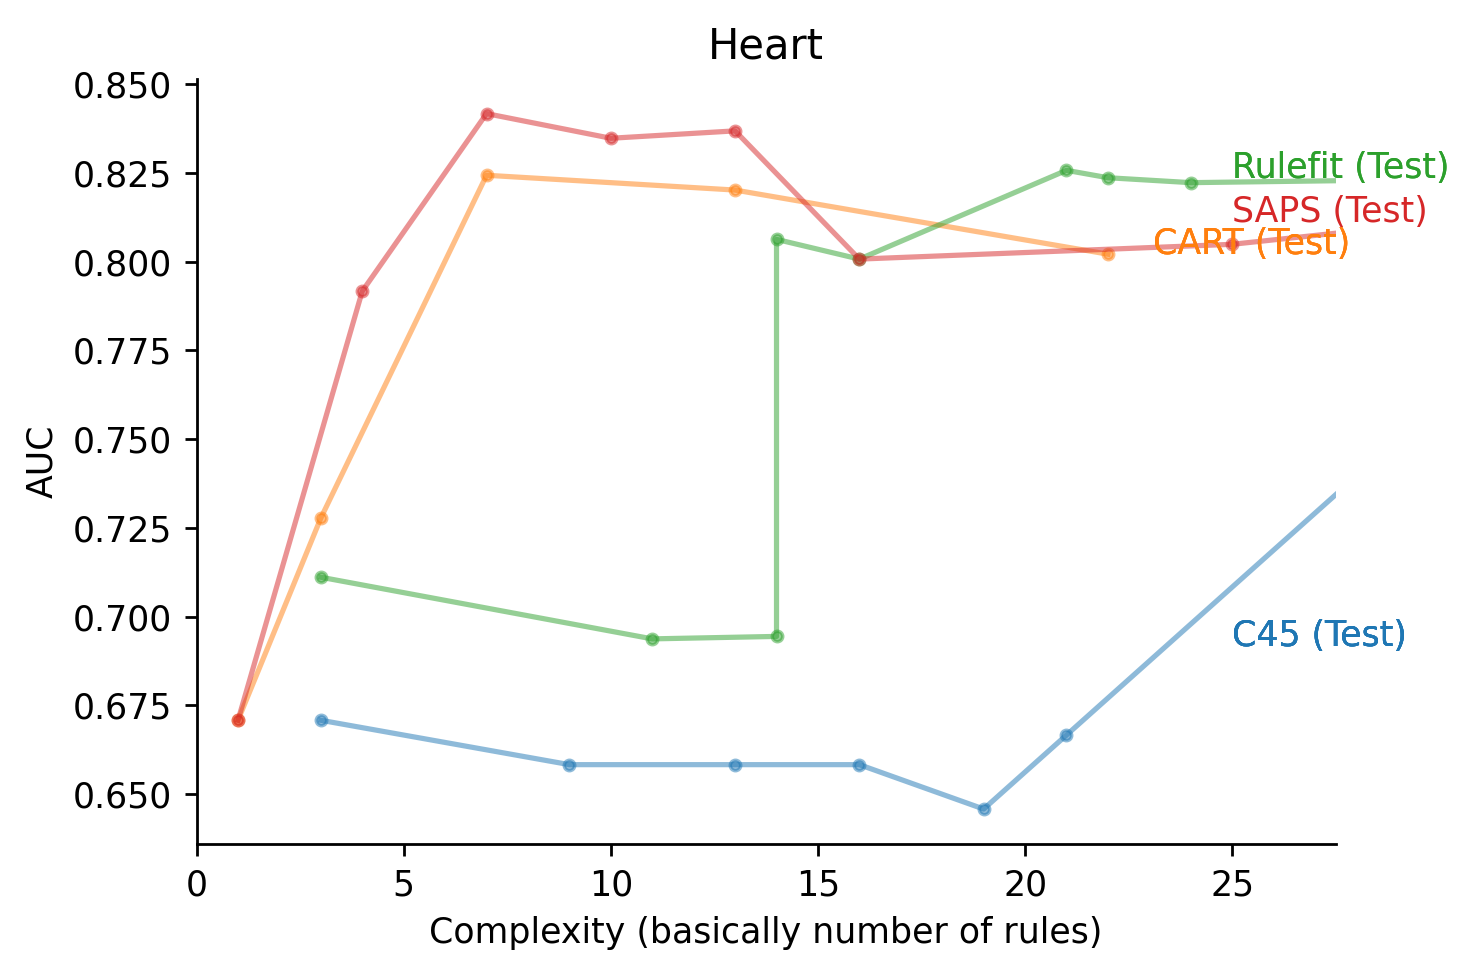

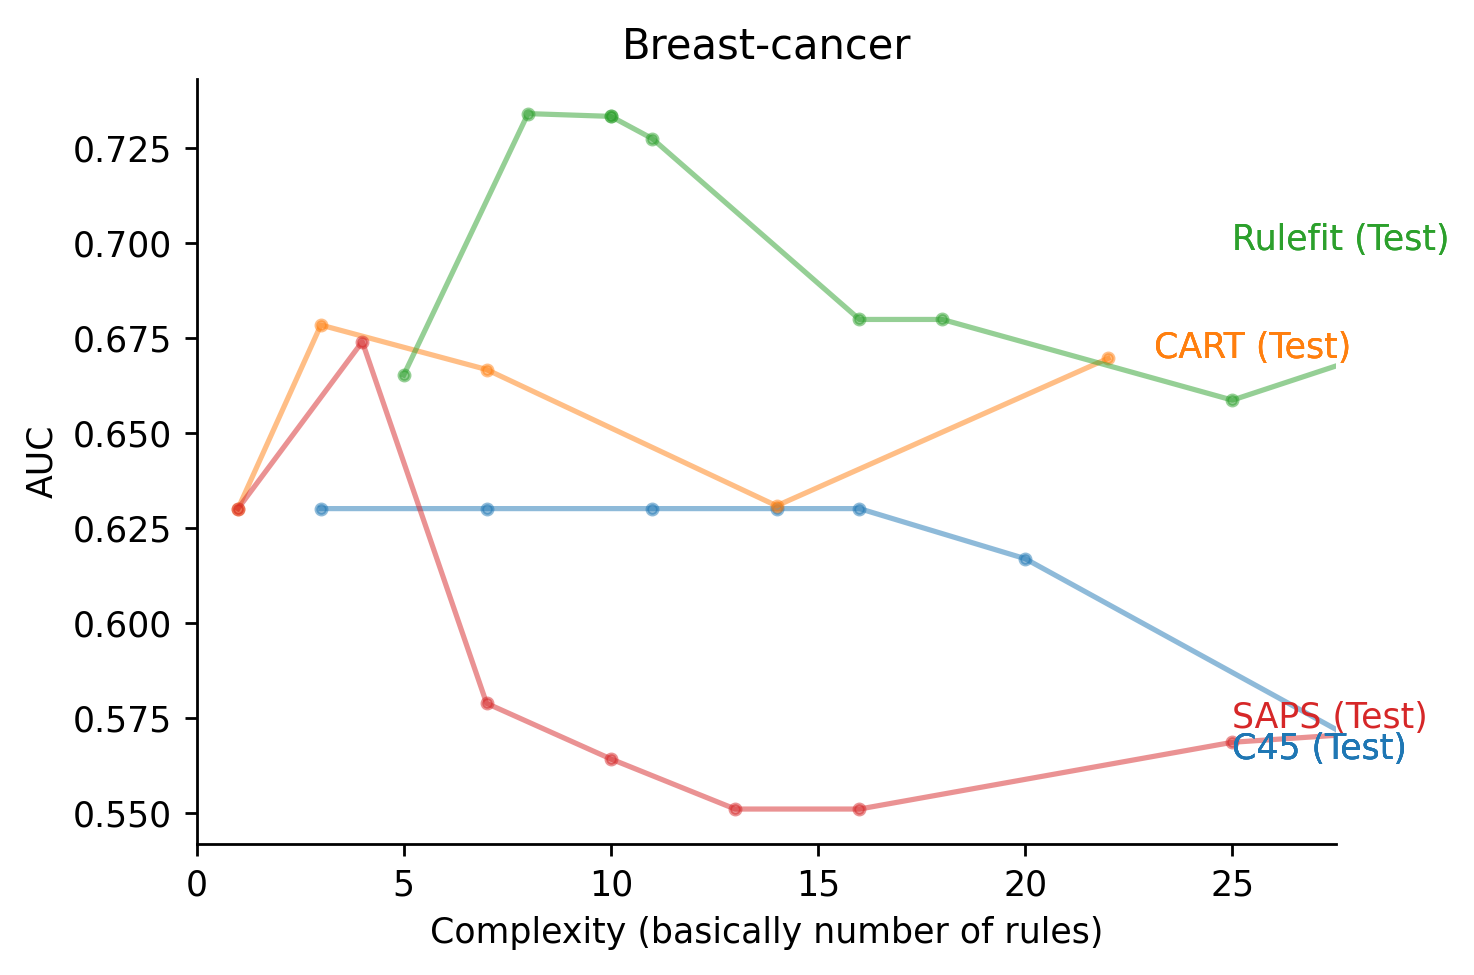

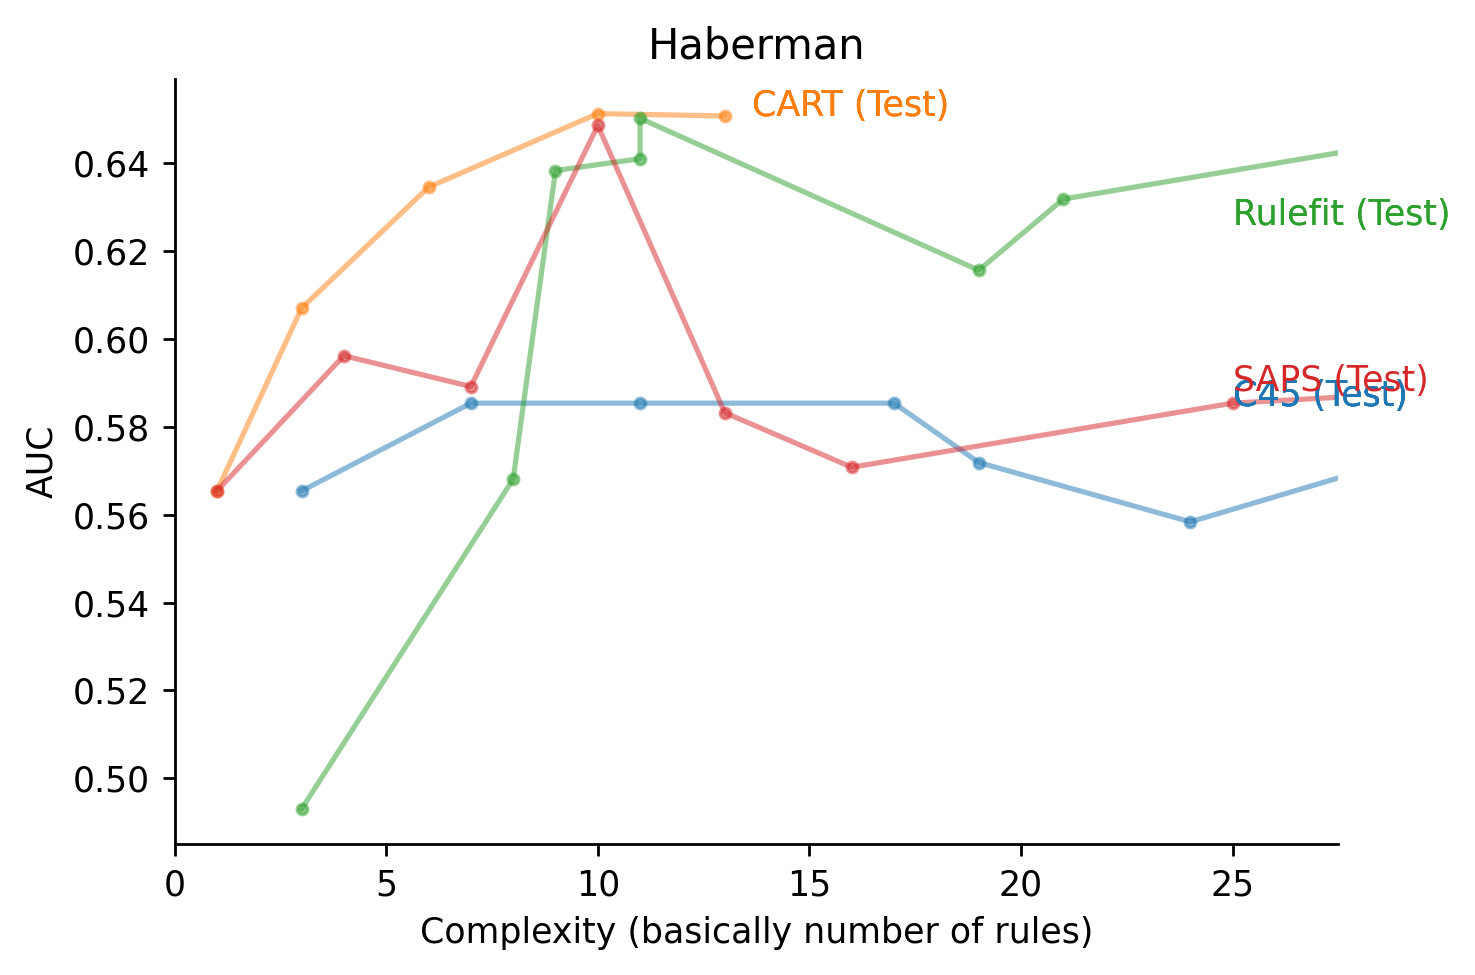

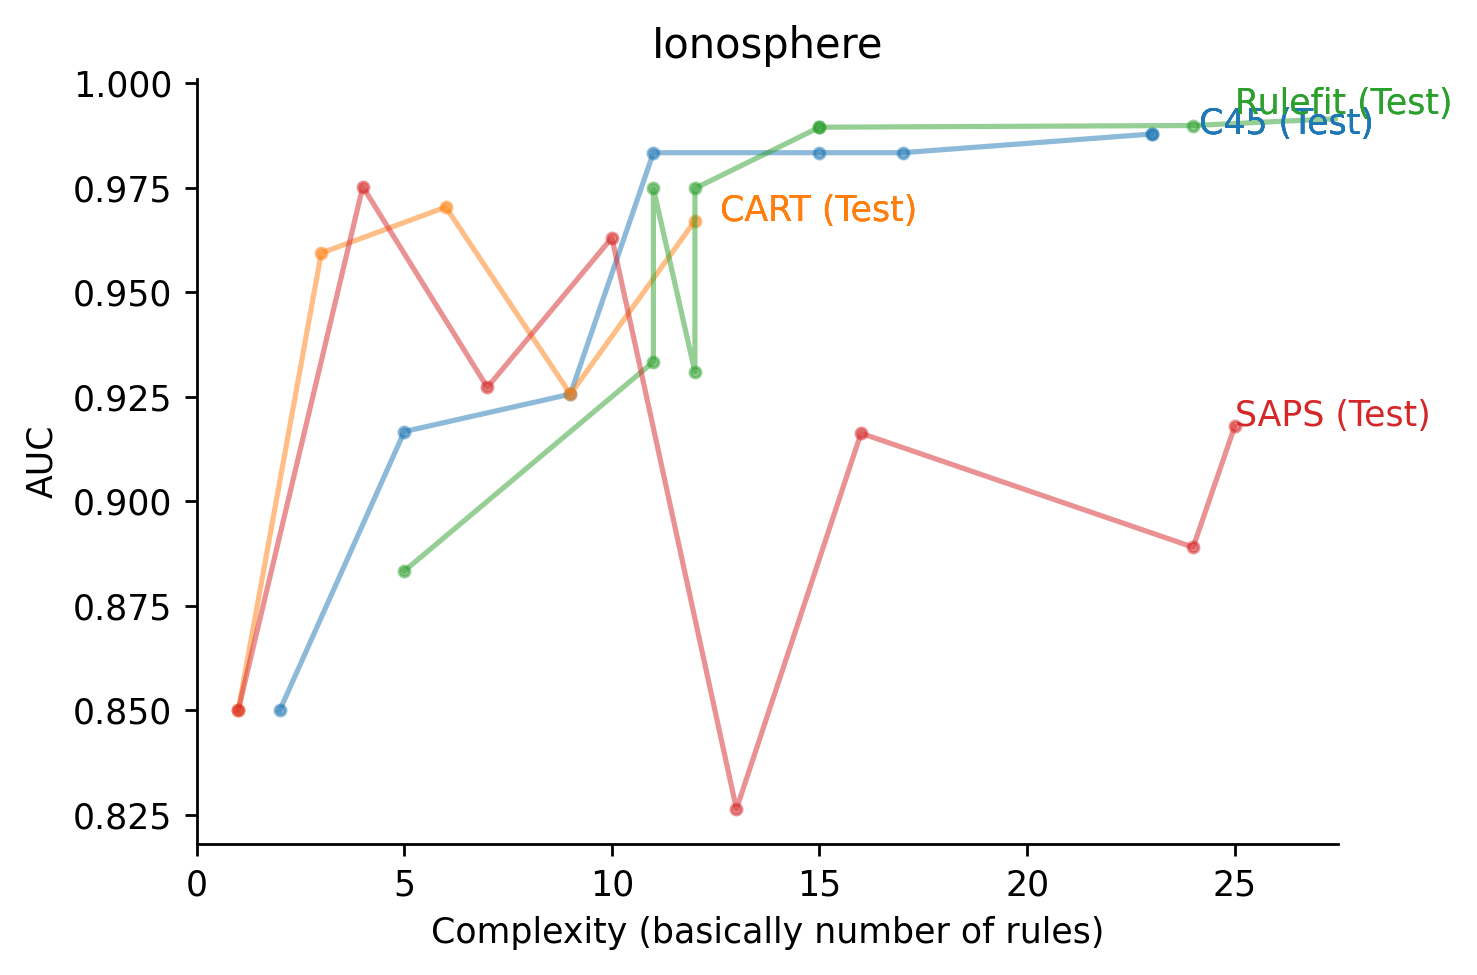

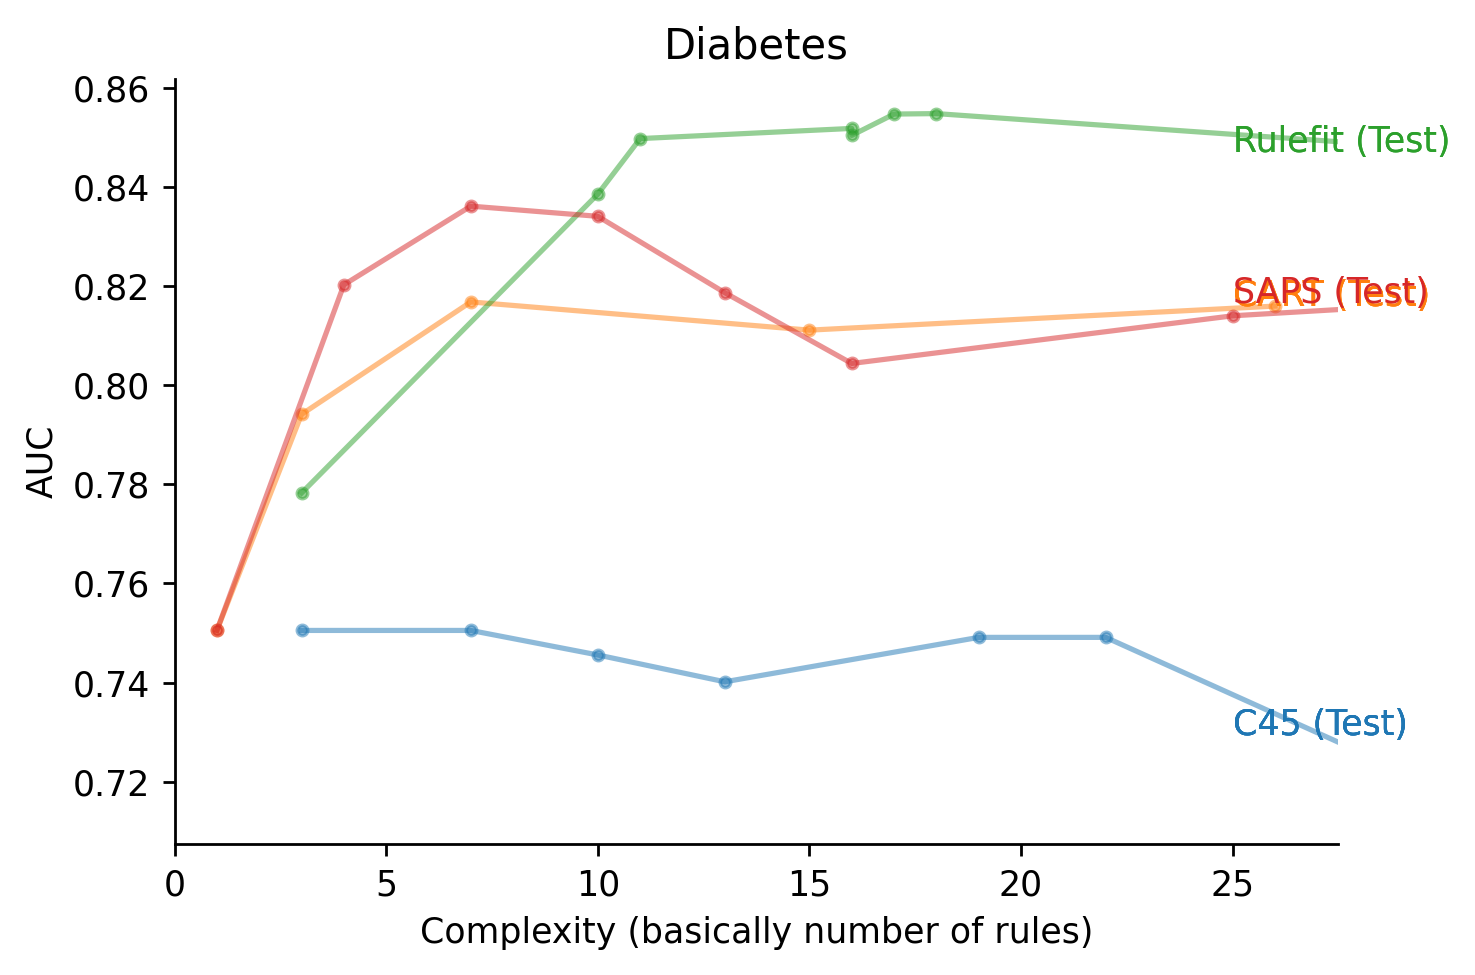

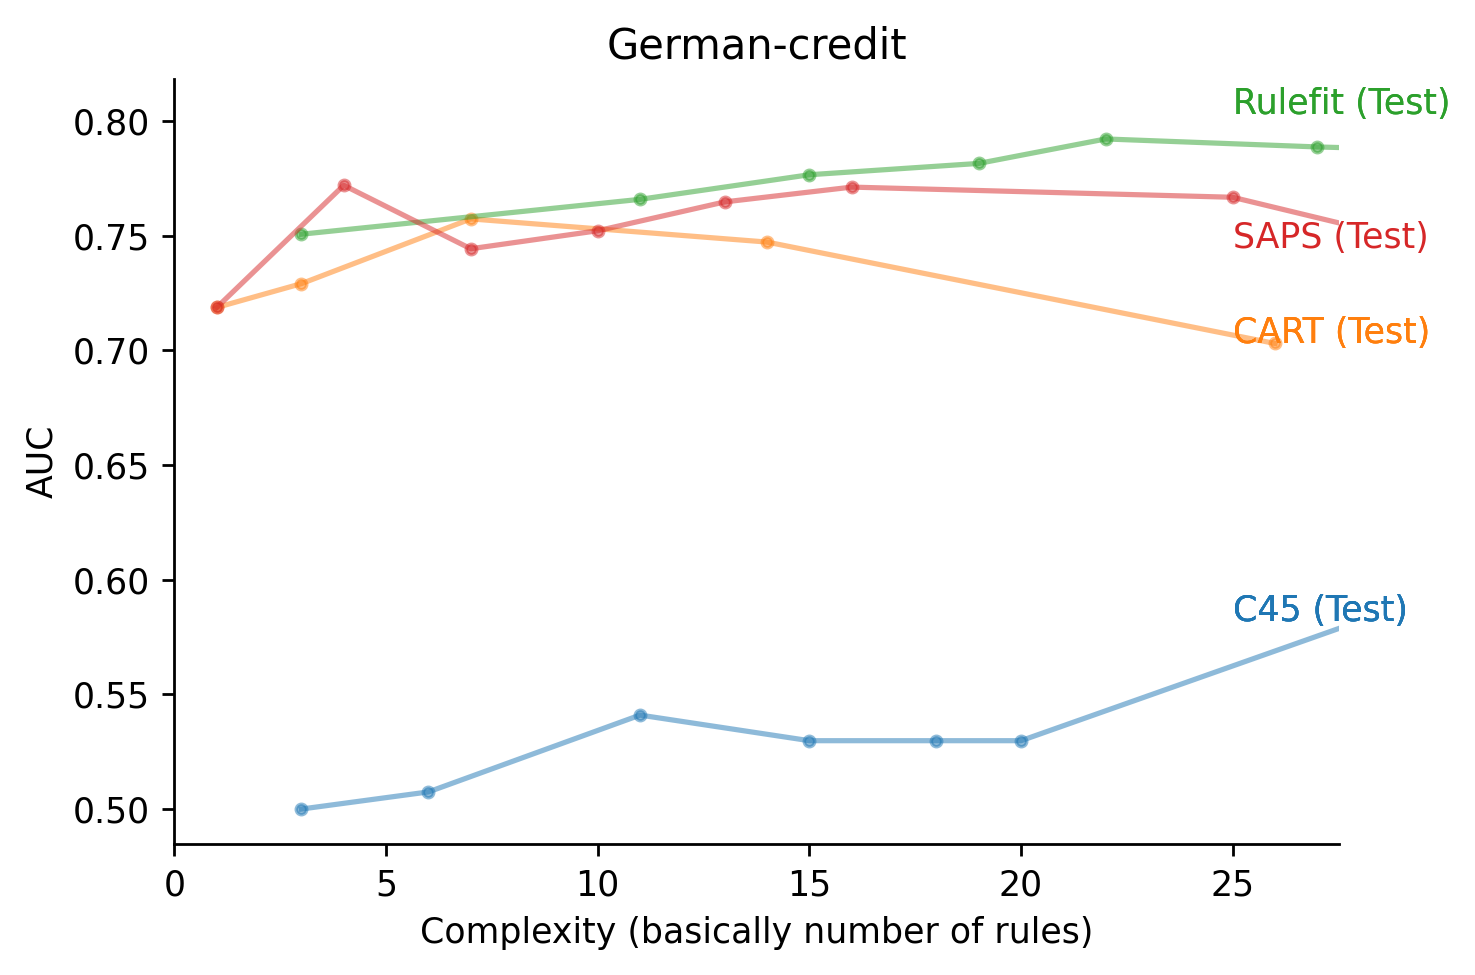

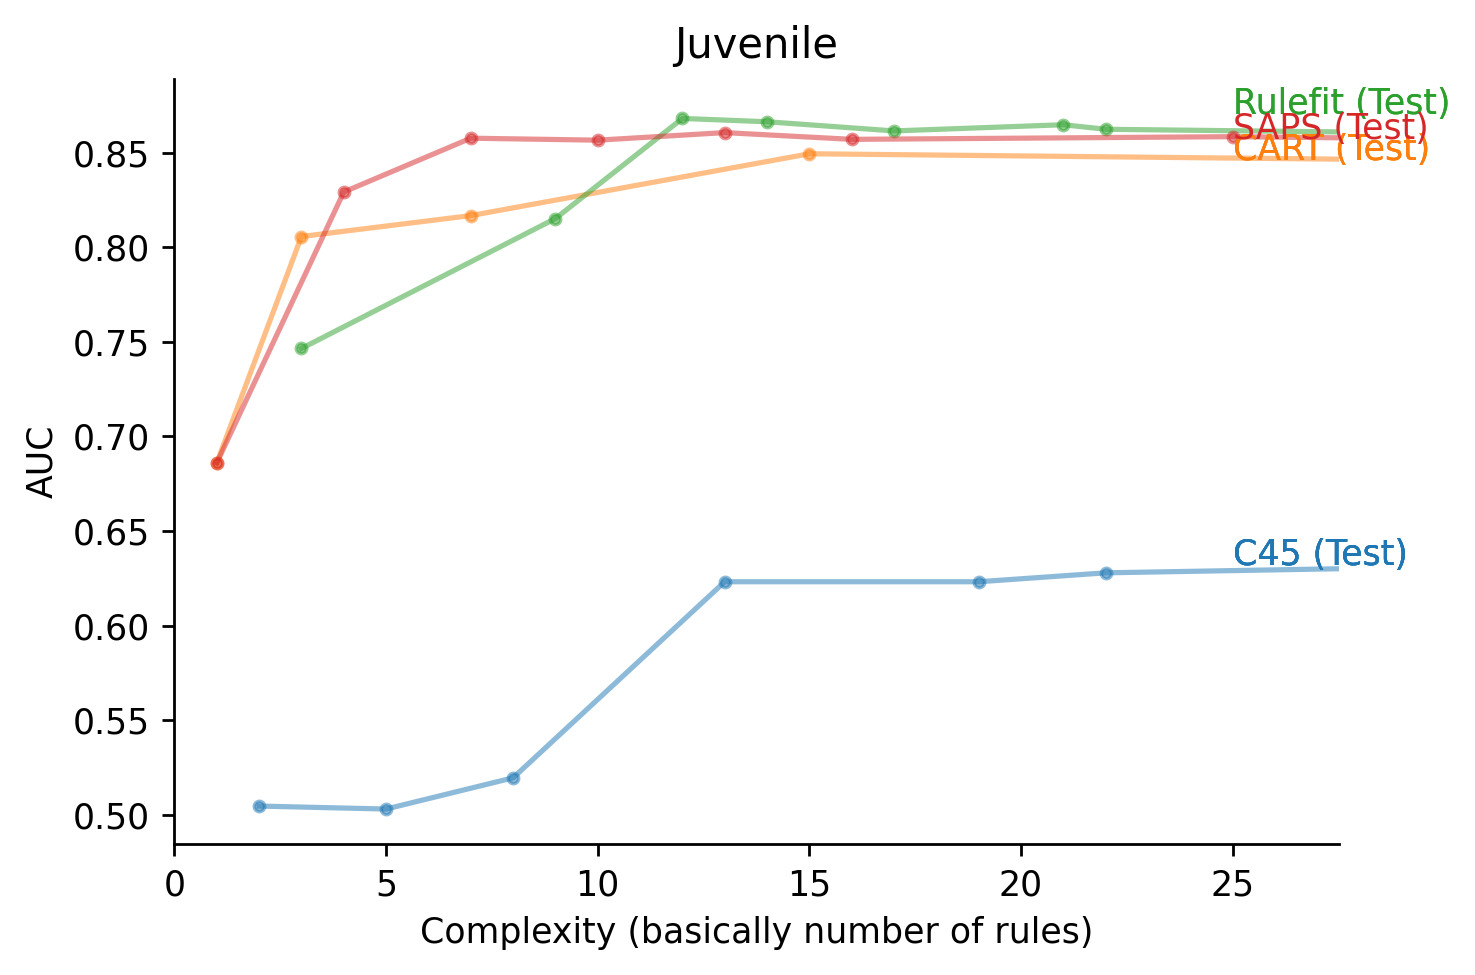

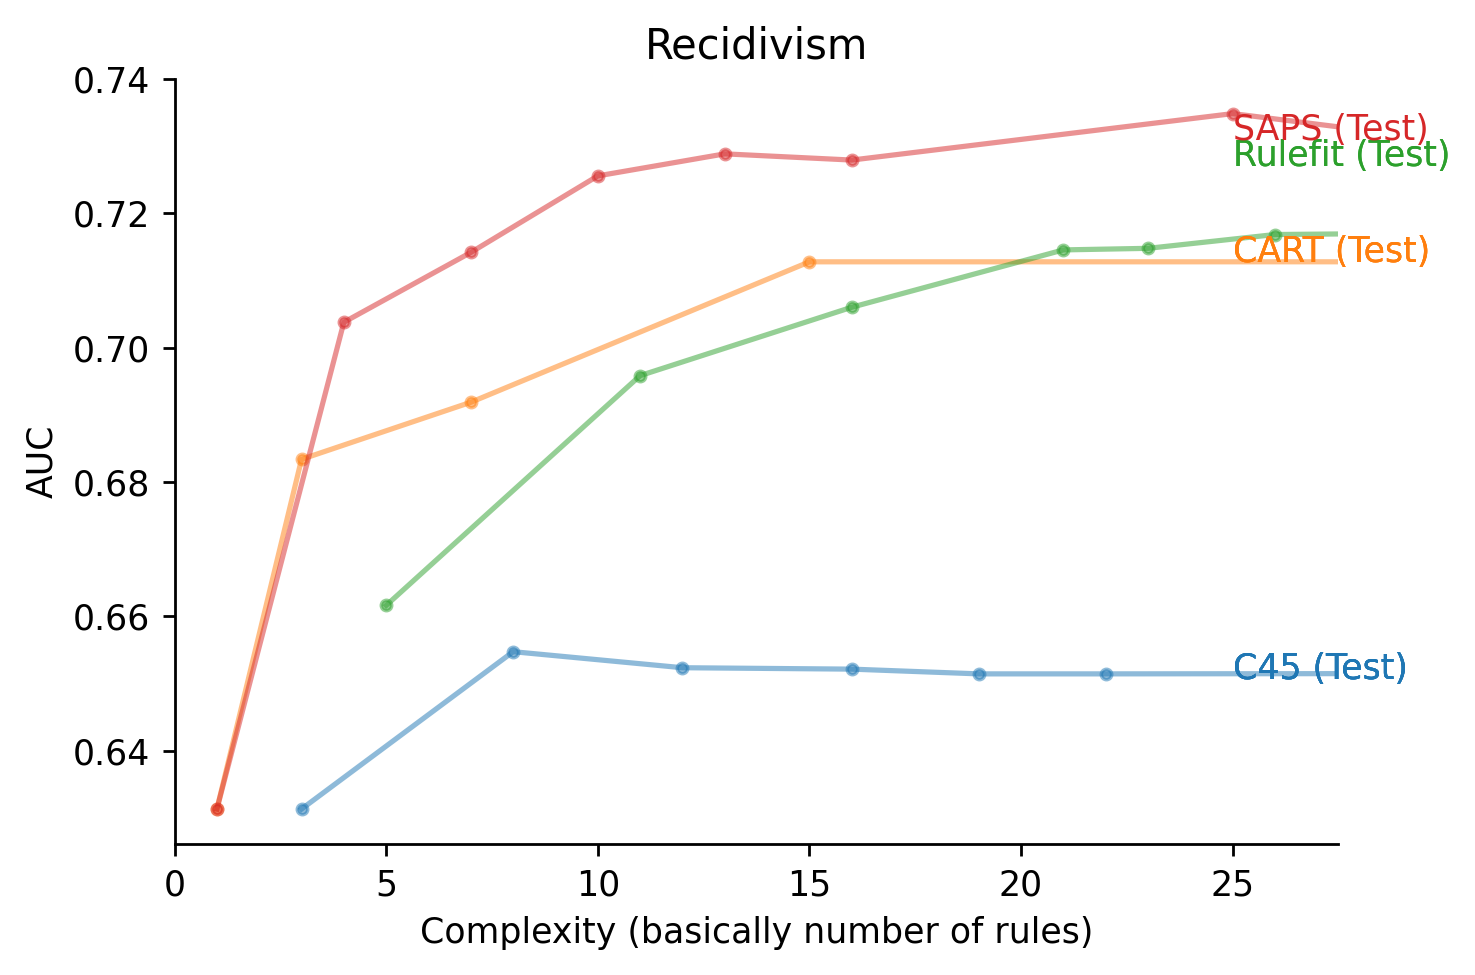

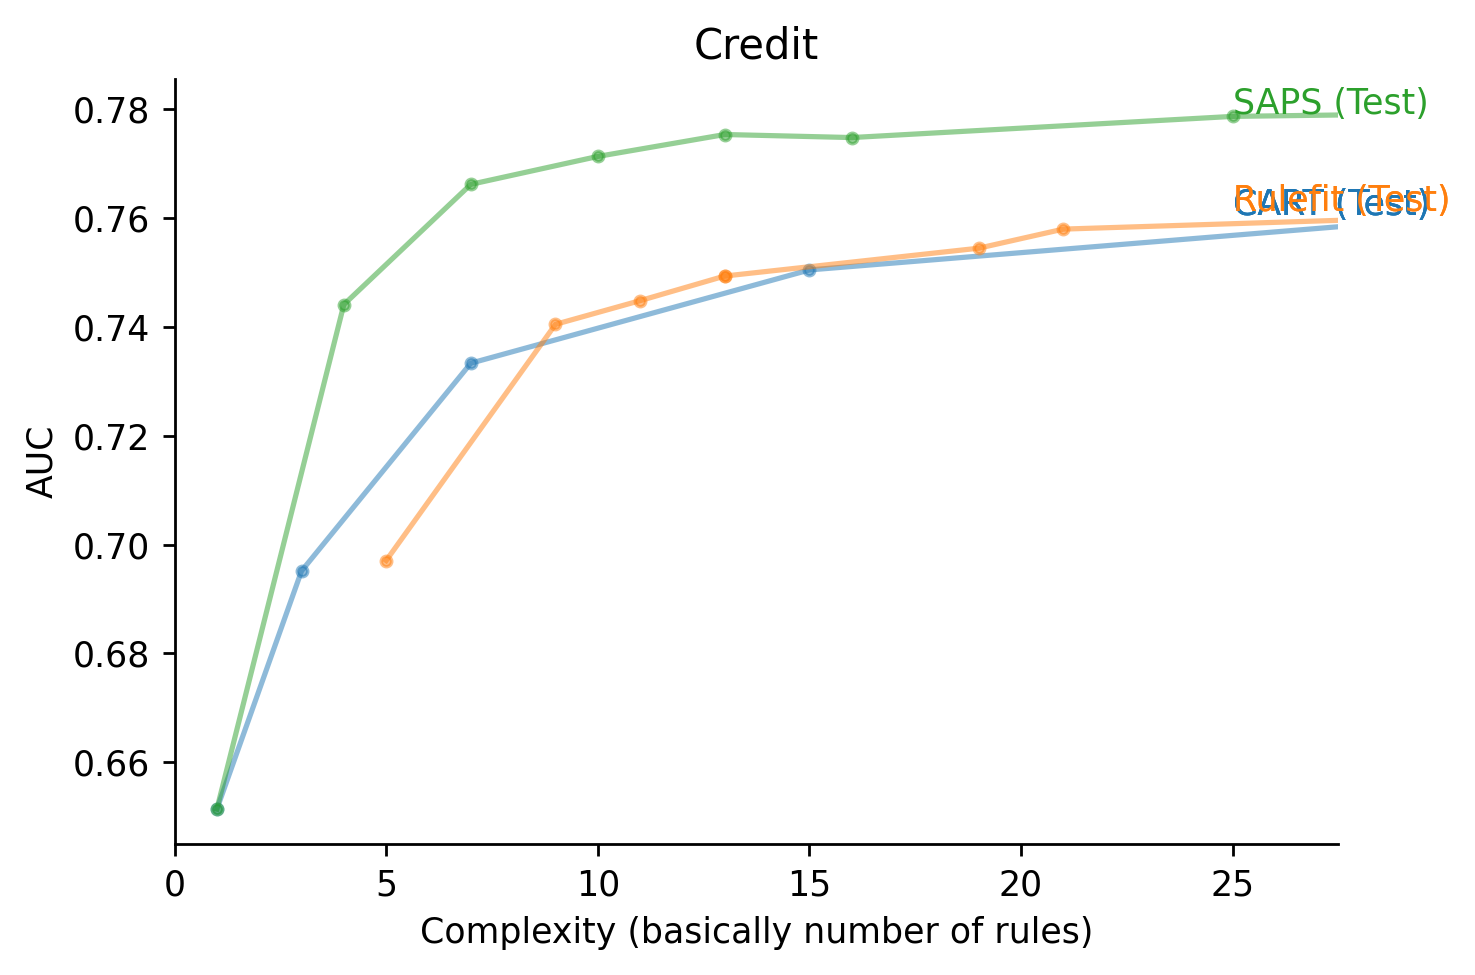

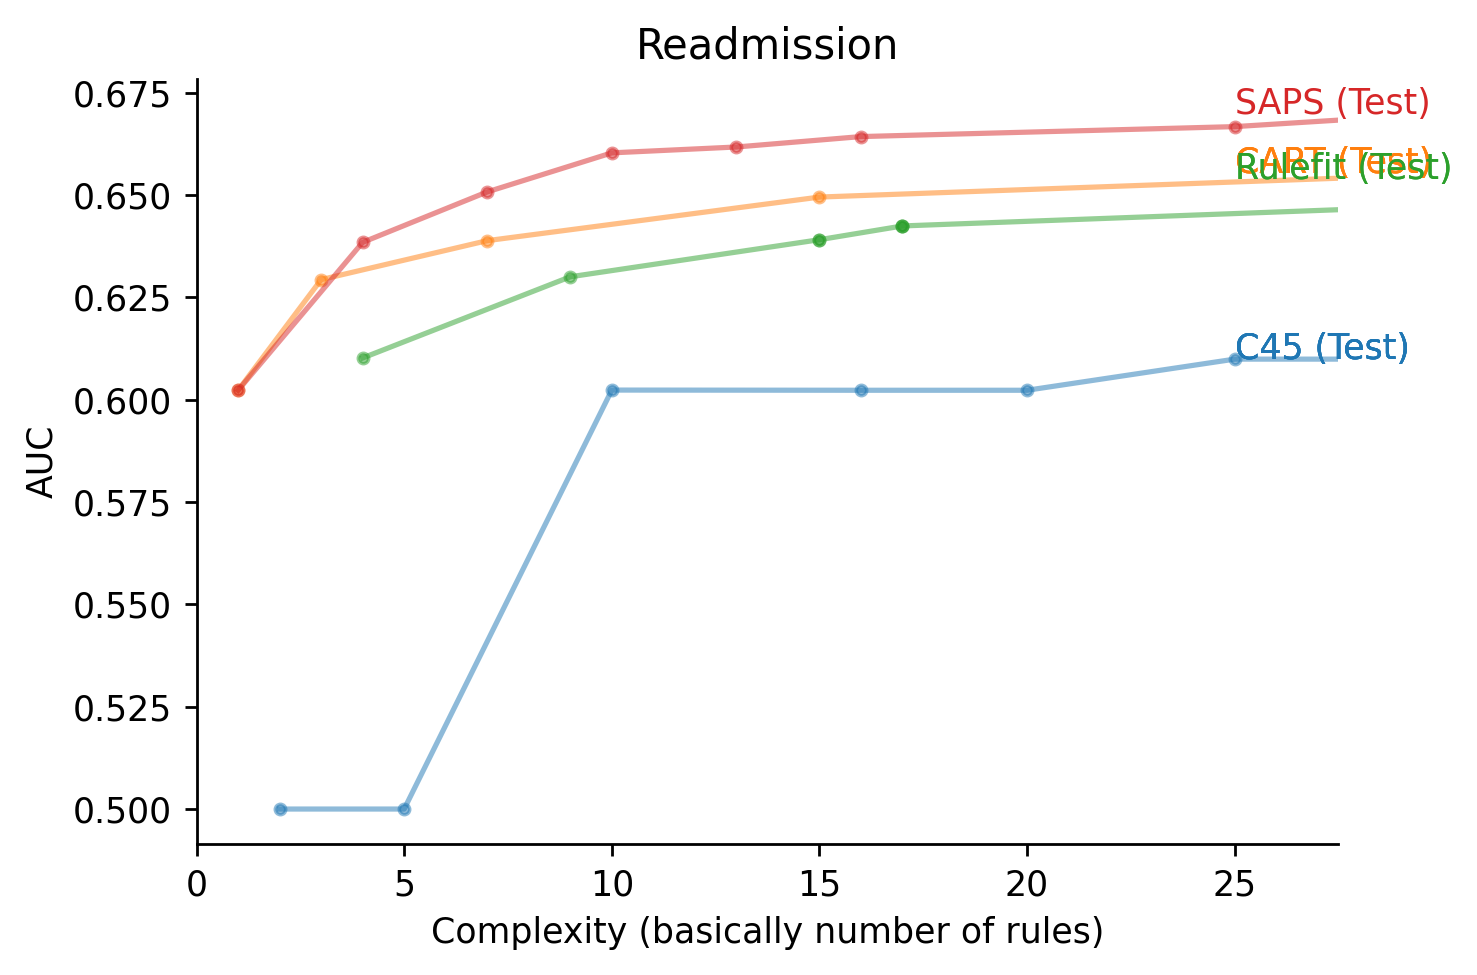

In [21]:
metric = 'rocauc'
for dset in DATASETS_CLASSIFICATION:
    dset_name = dset[0]
    try:
        pkl_file = oj('results', 'saps', dset_name, 'train-test/combined.pkl')
        df = pkl.load(open(pkl_file, 'rb'))['df']
        df['model'] = df.index

        #     print(list(df.keys()))
        plt.figure(figsize=(6, 4))
        #     R, C = 1, 2
        for i, (name, g) in enumerate(df.groupby('model')):
            args = np.argsort(g[f'{dset_name}_complexity'])
            plt.title(dset_name.capitalize())
            alpha = 1.0 if 'saps' in dset_name else 0.5            
            kwargs = dict(color=colors[i], alpha=alpha)            

            plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs,
                     label=name + ' (Test)')
#             plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs,
#                      label=name + ' (Train)')
            plt.xlabel('Complexity (basically number of rules)')
            plt.xlim((0, 25))
            plt.ylabel('AUC')
            dvu.line_legend(fontsize=10, xoffset_spacing=0.05, adjust_text_labels=False)
        plt.show()
    except:
        print('skipping', dset_name)

# regression

In [23]:
df.keys()

Index(['max_rules', 'readmission_rocauc_train', 'readmission_accuracy_train',
       'readmission_f1_train', 'readmission_recall_train',
       'readmission_precision_train', 'readmission_avg_precision_train',
       'readmission_best_accuracy_train', 'readmission_rocauc_test',
       'readmission_accuracy_test', 'readmission_f1_test',
       'readmission_recall_test', 'readmission_precision_test',
       'readmission_avg_precision_test', 'readmission_best_accuracy_test',
       'readmission_complexity', 'readmission_time', 'mean_rocauc',
       'mean_accuracy', 'mean_f1', 'mean_recall', 'mean_precision',
       'mean_avg_precision', 'mean_best_accuracy', 'mean_complexity',
       'mean_time', 'n_estimators', 'max_depth', 'model'],
      dtype='object')

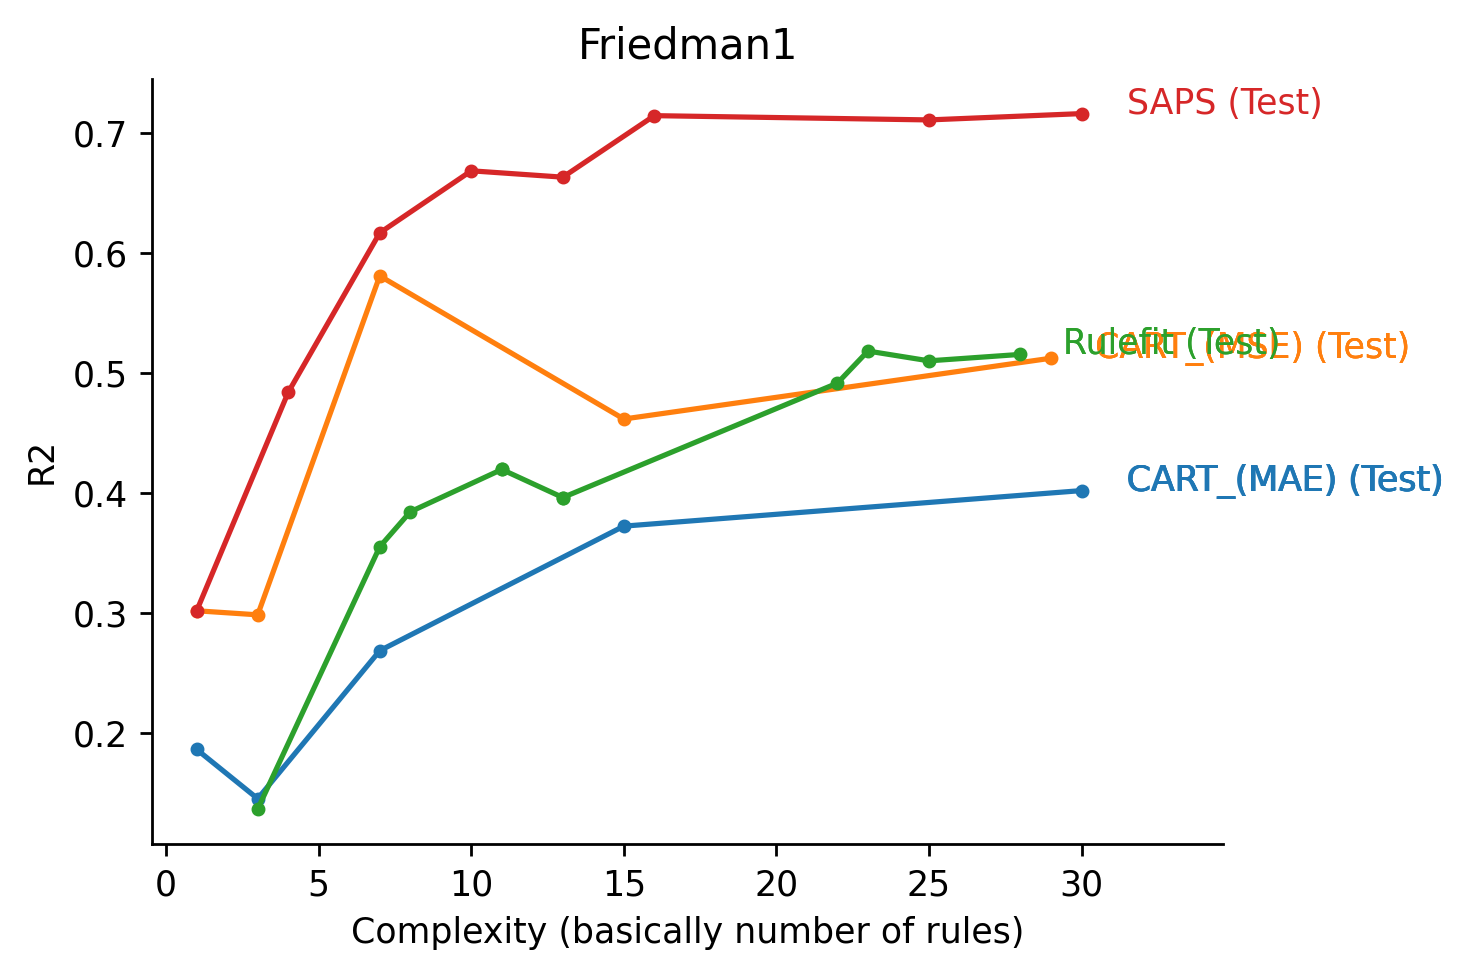

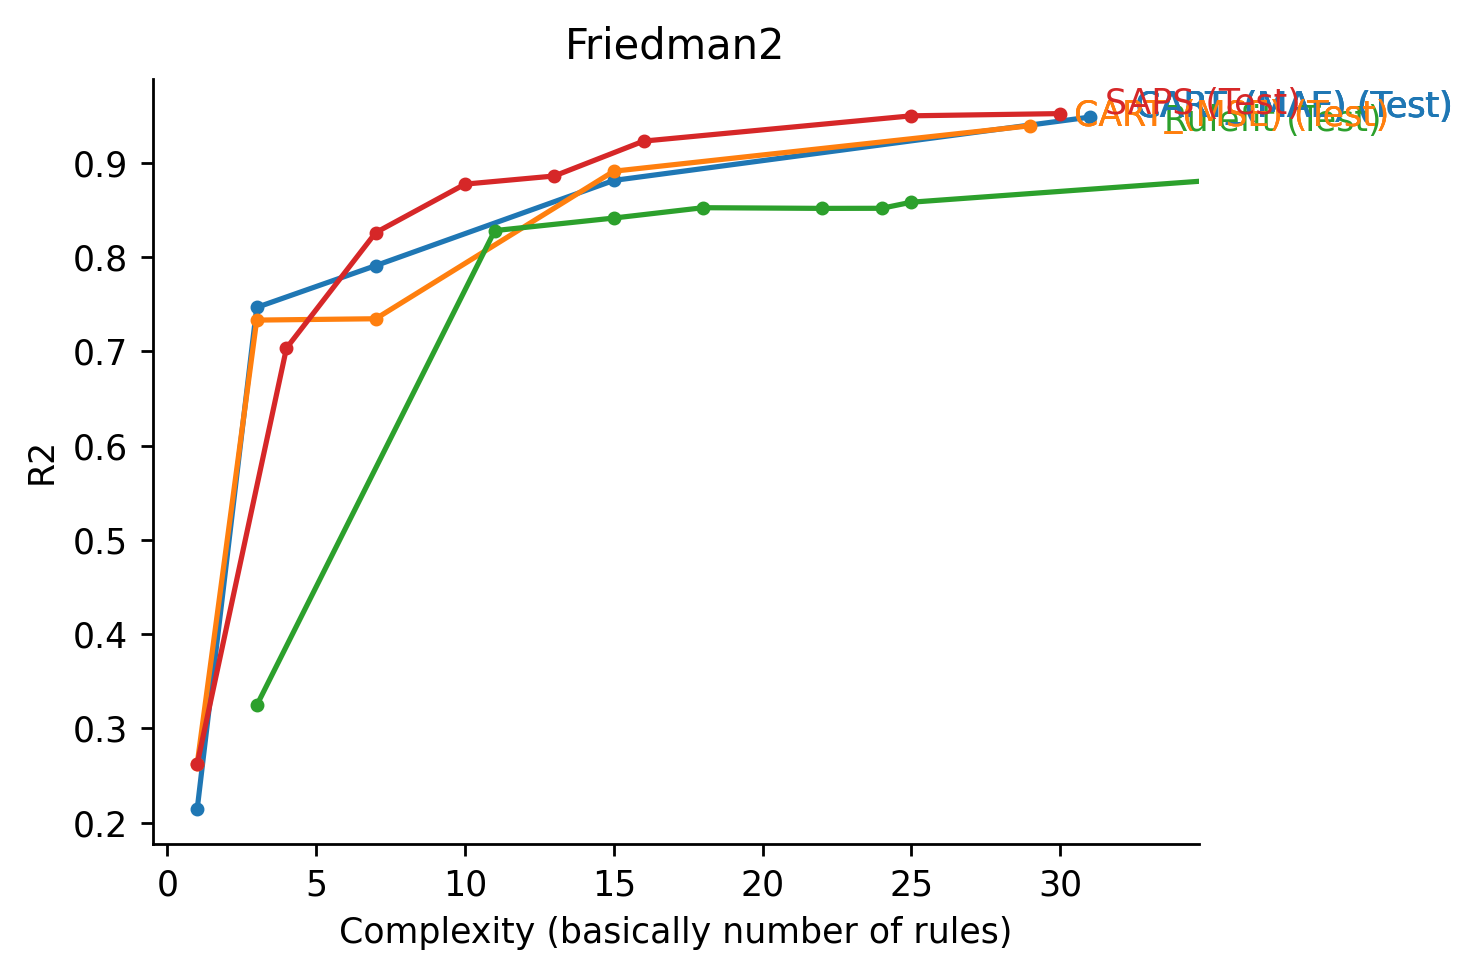

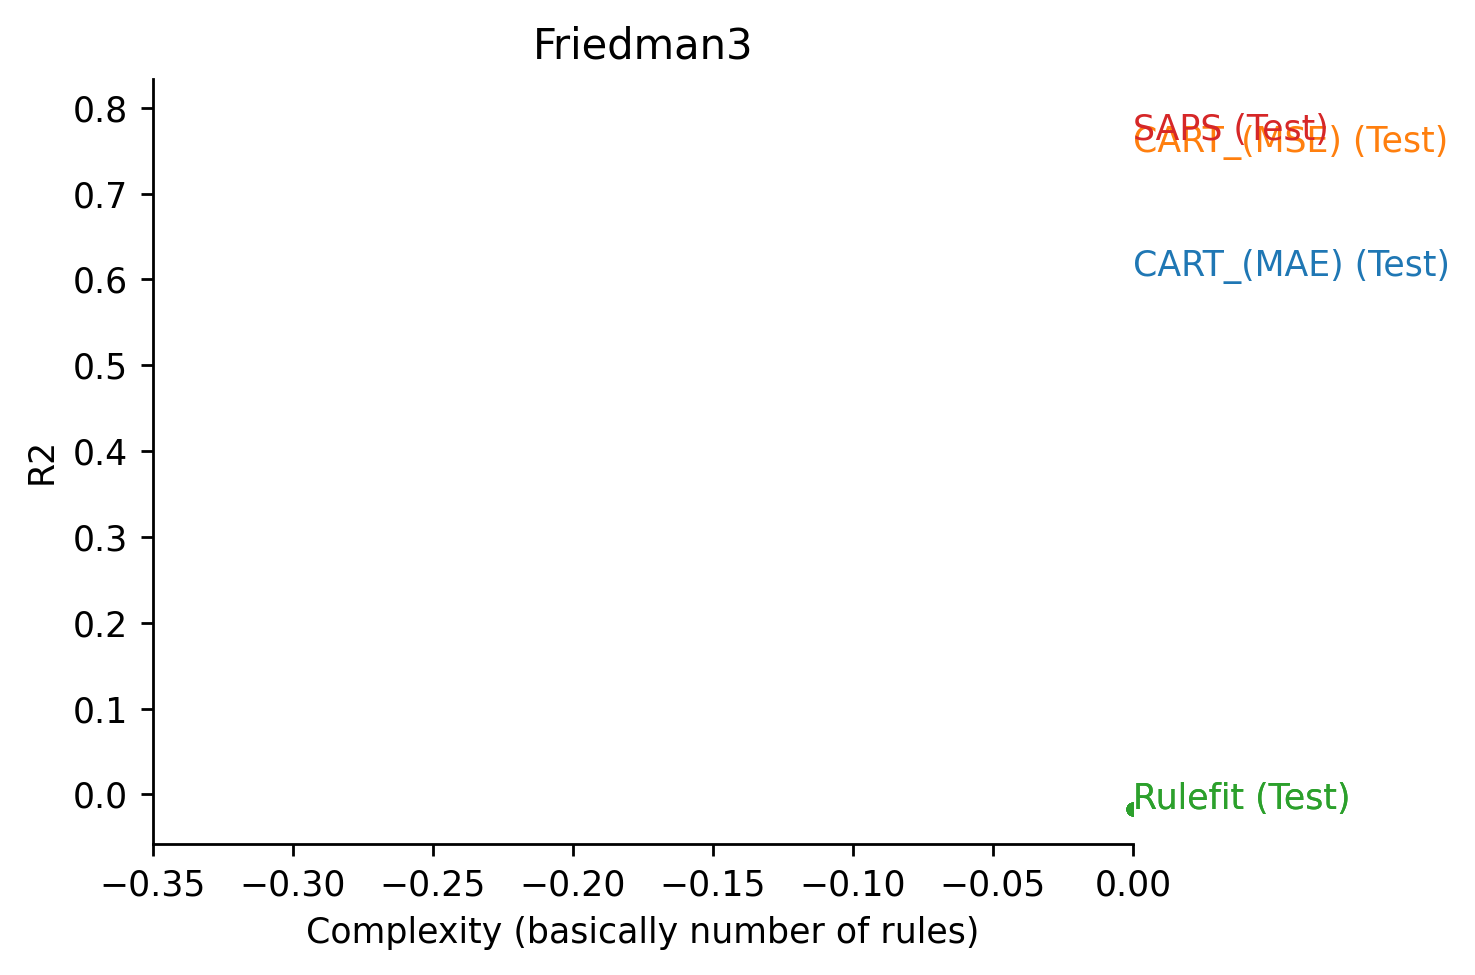

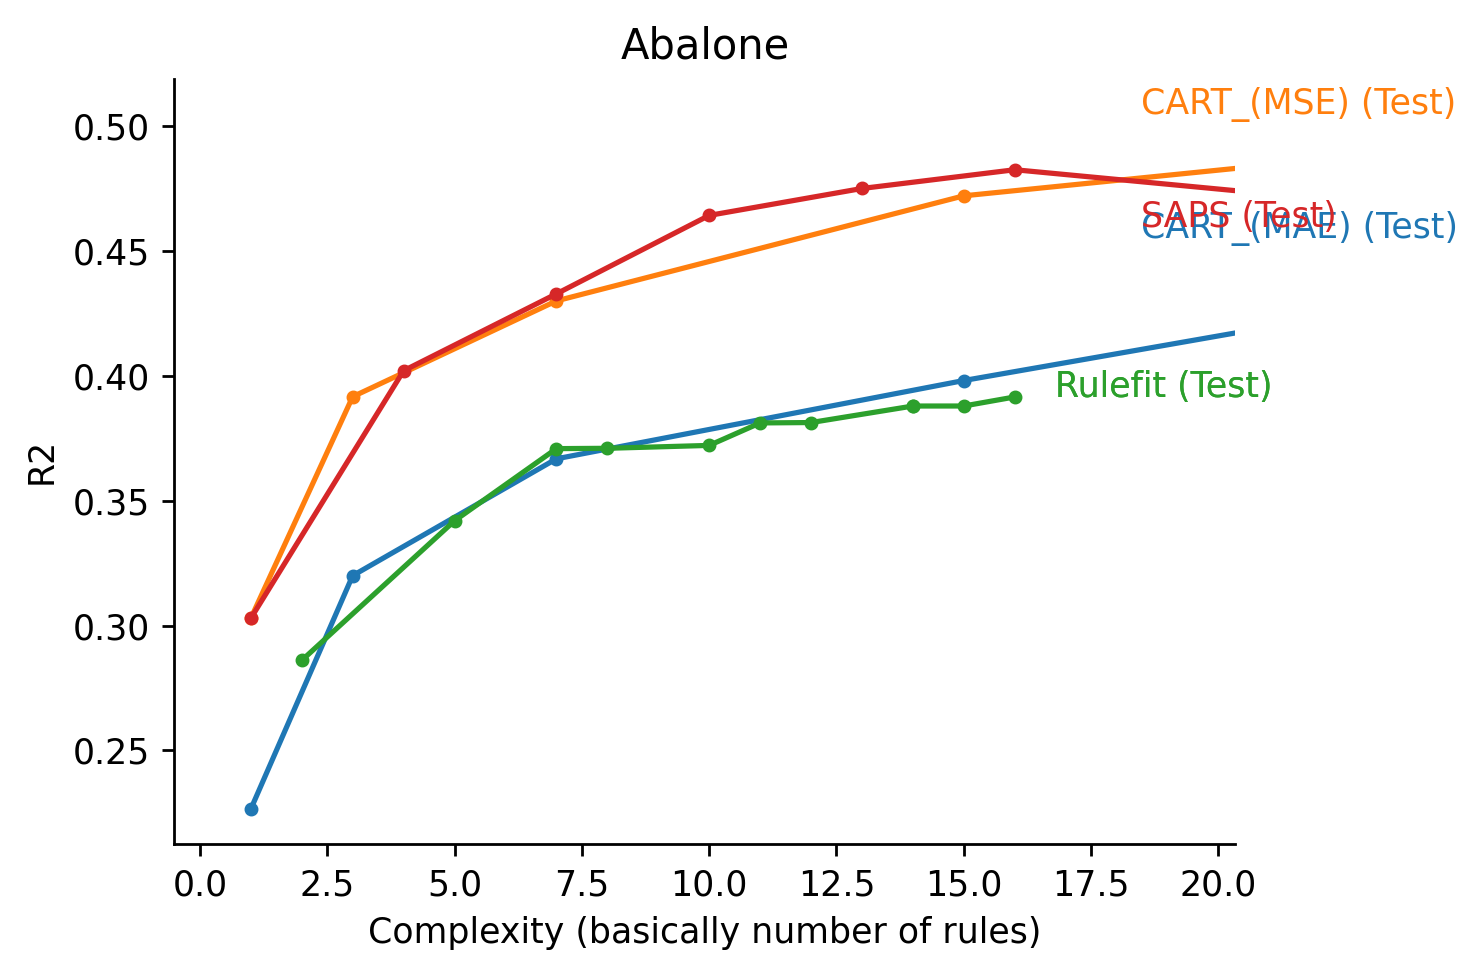

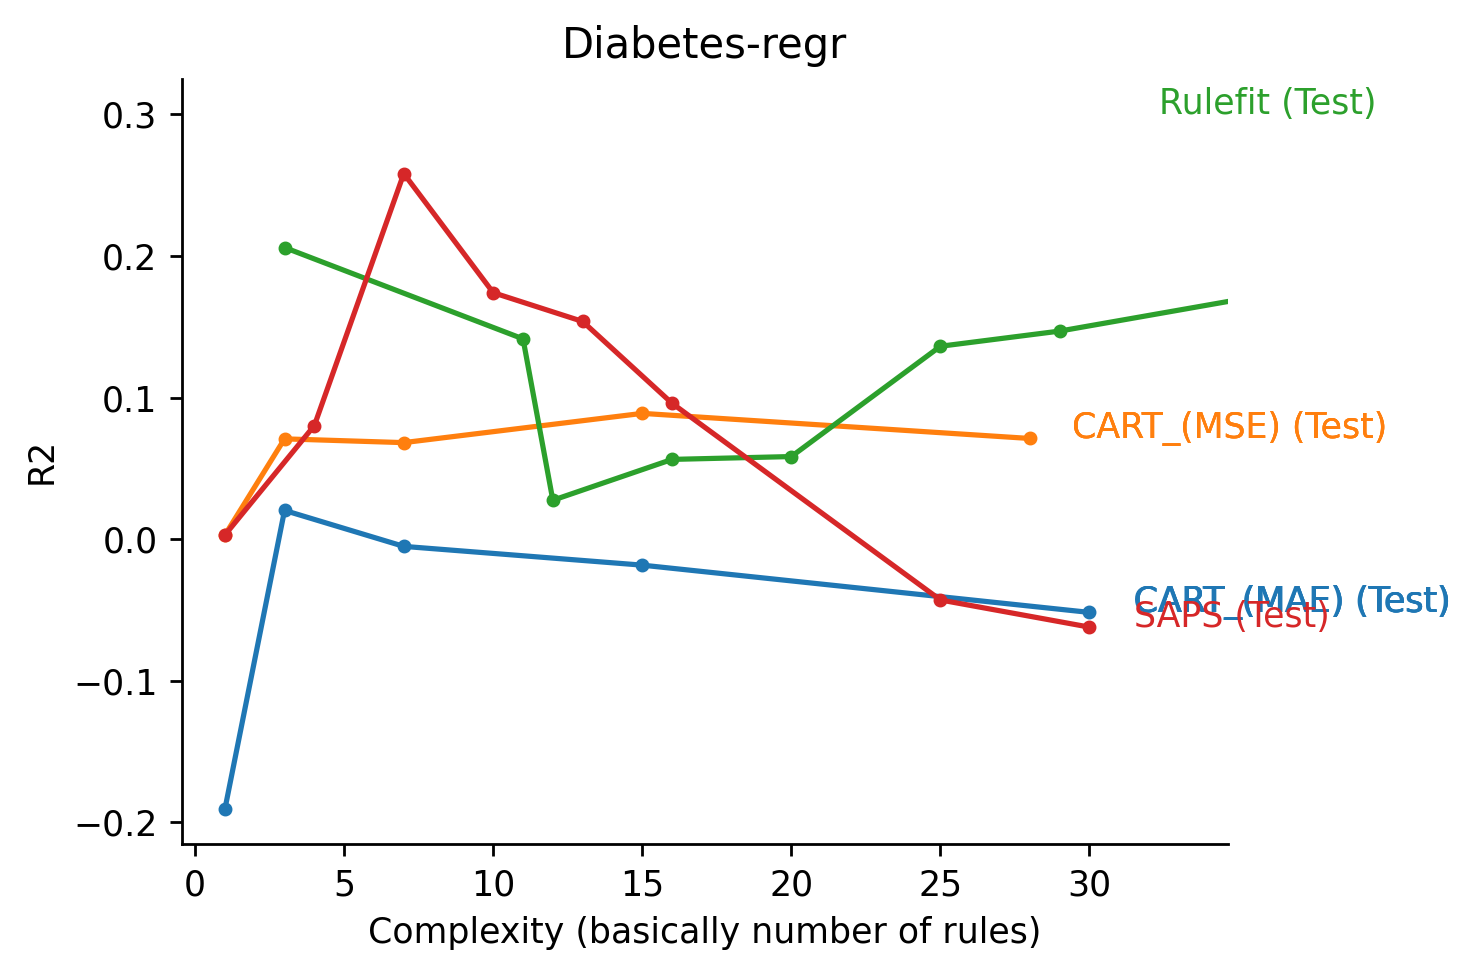

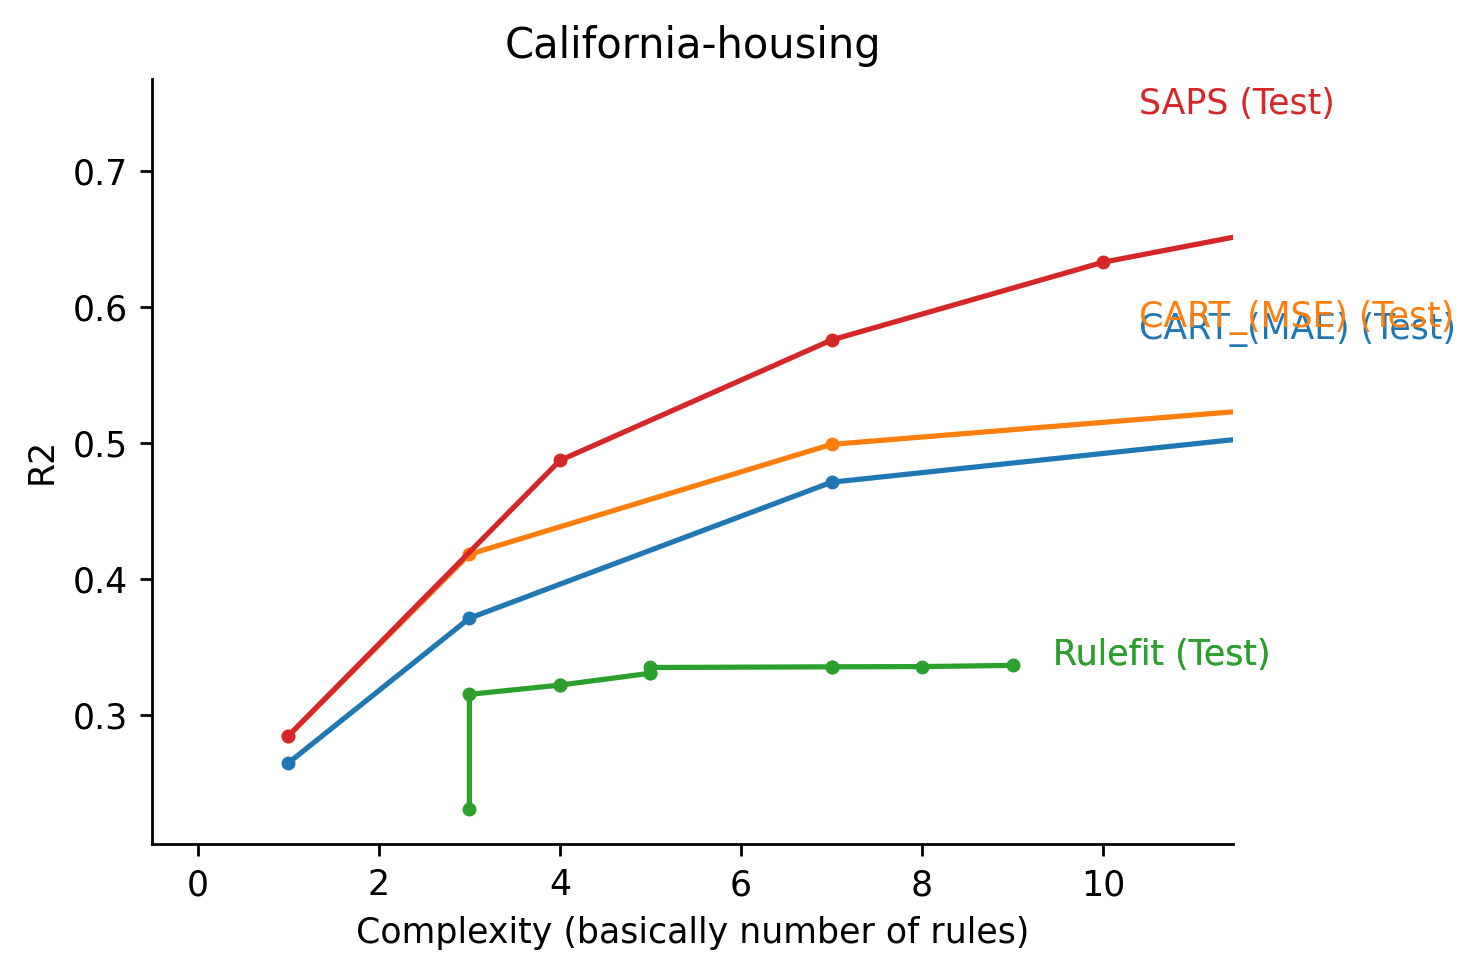

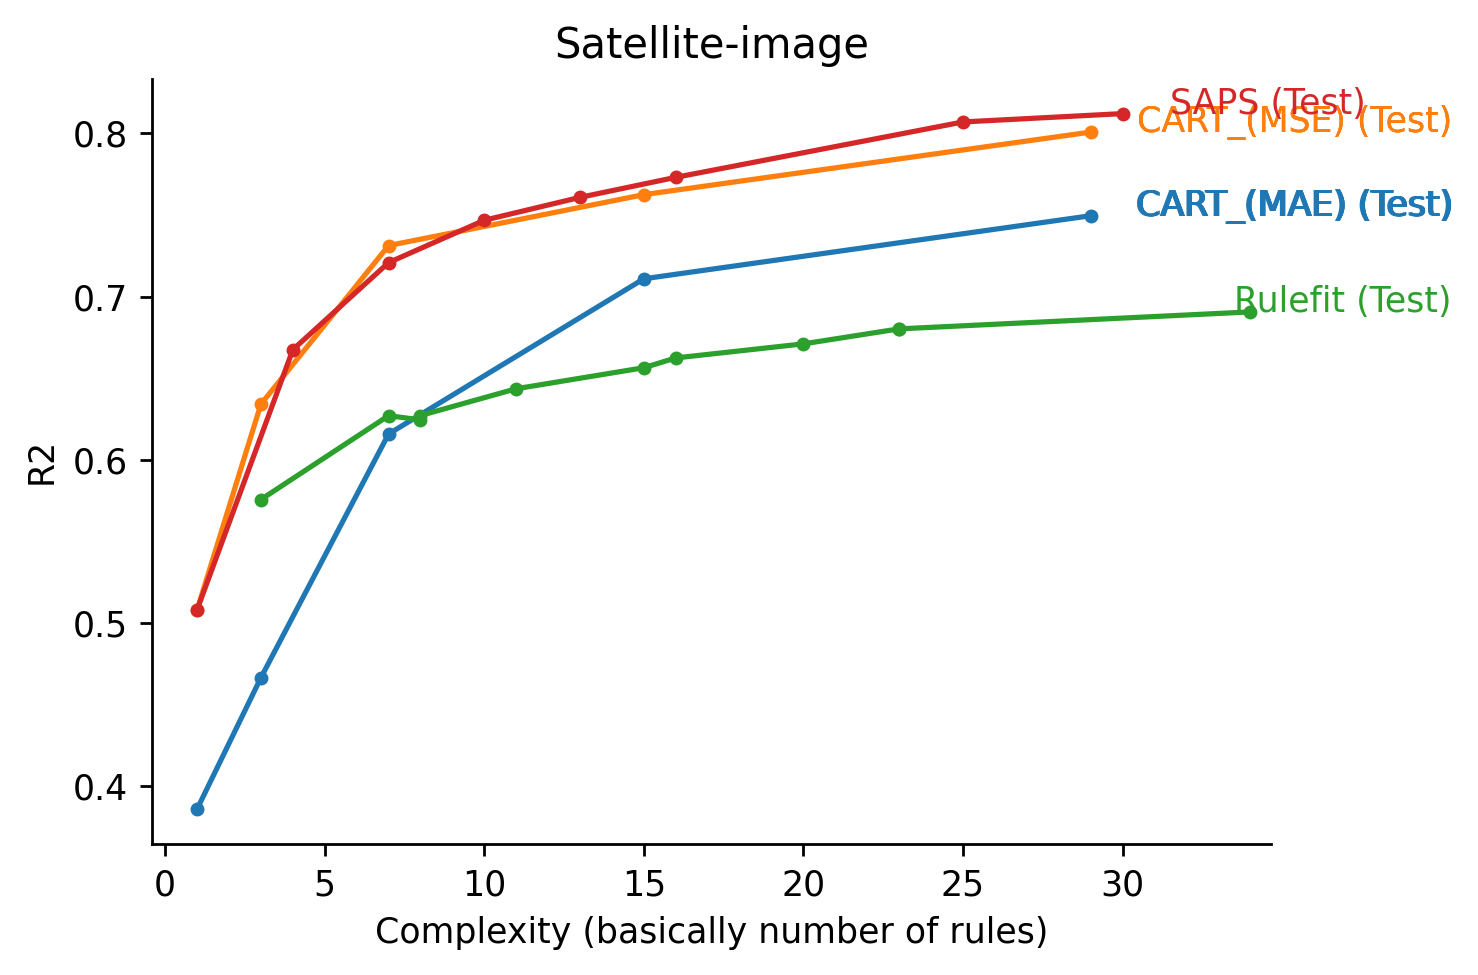

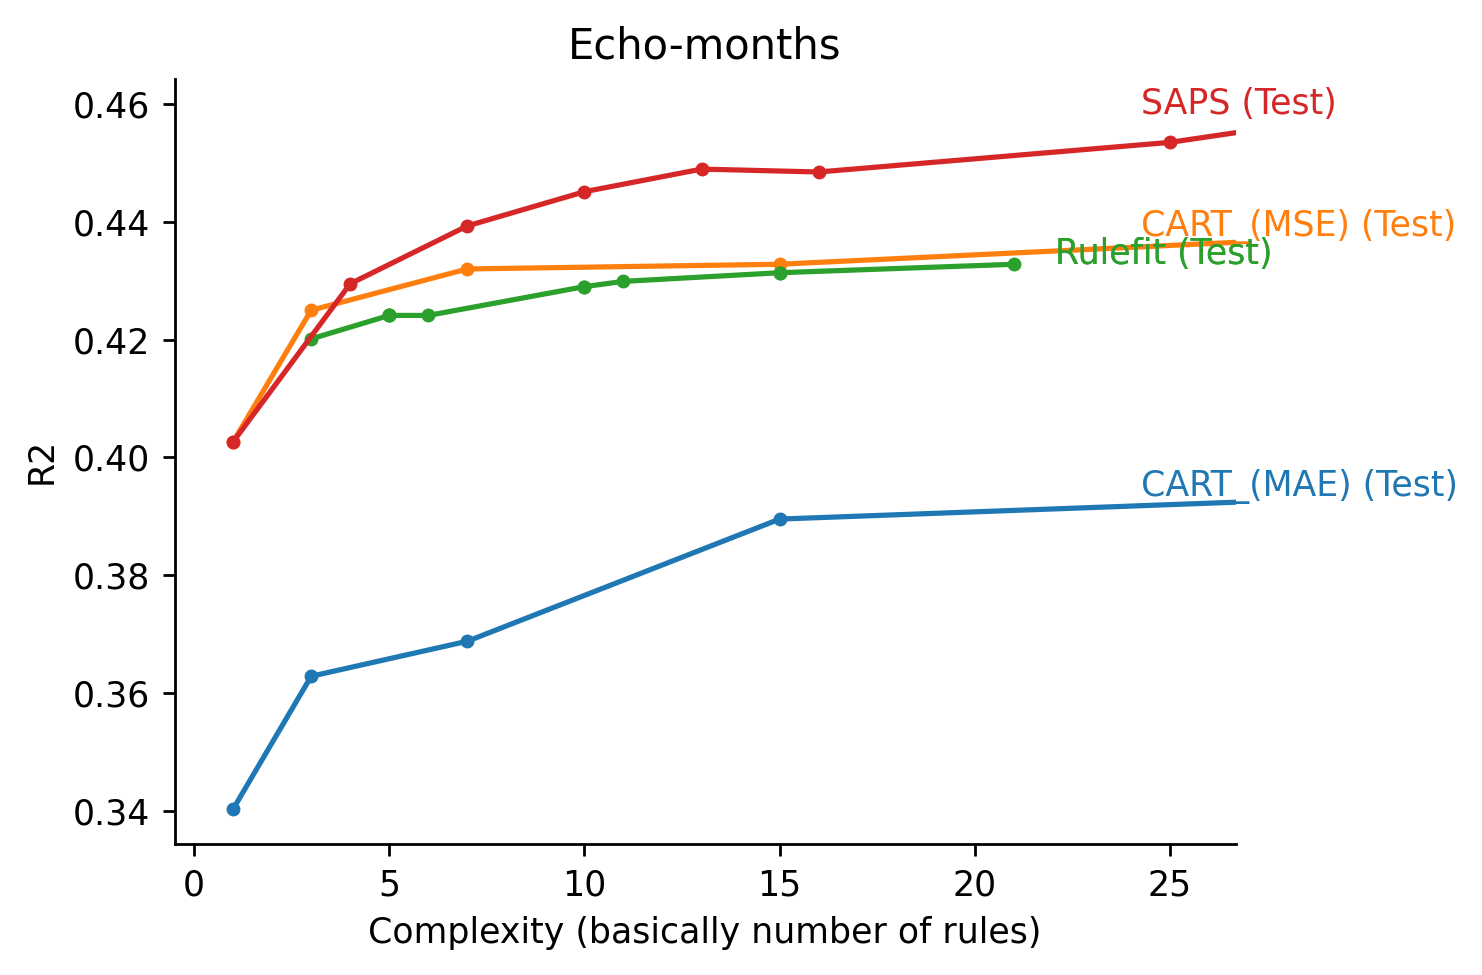

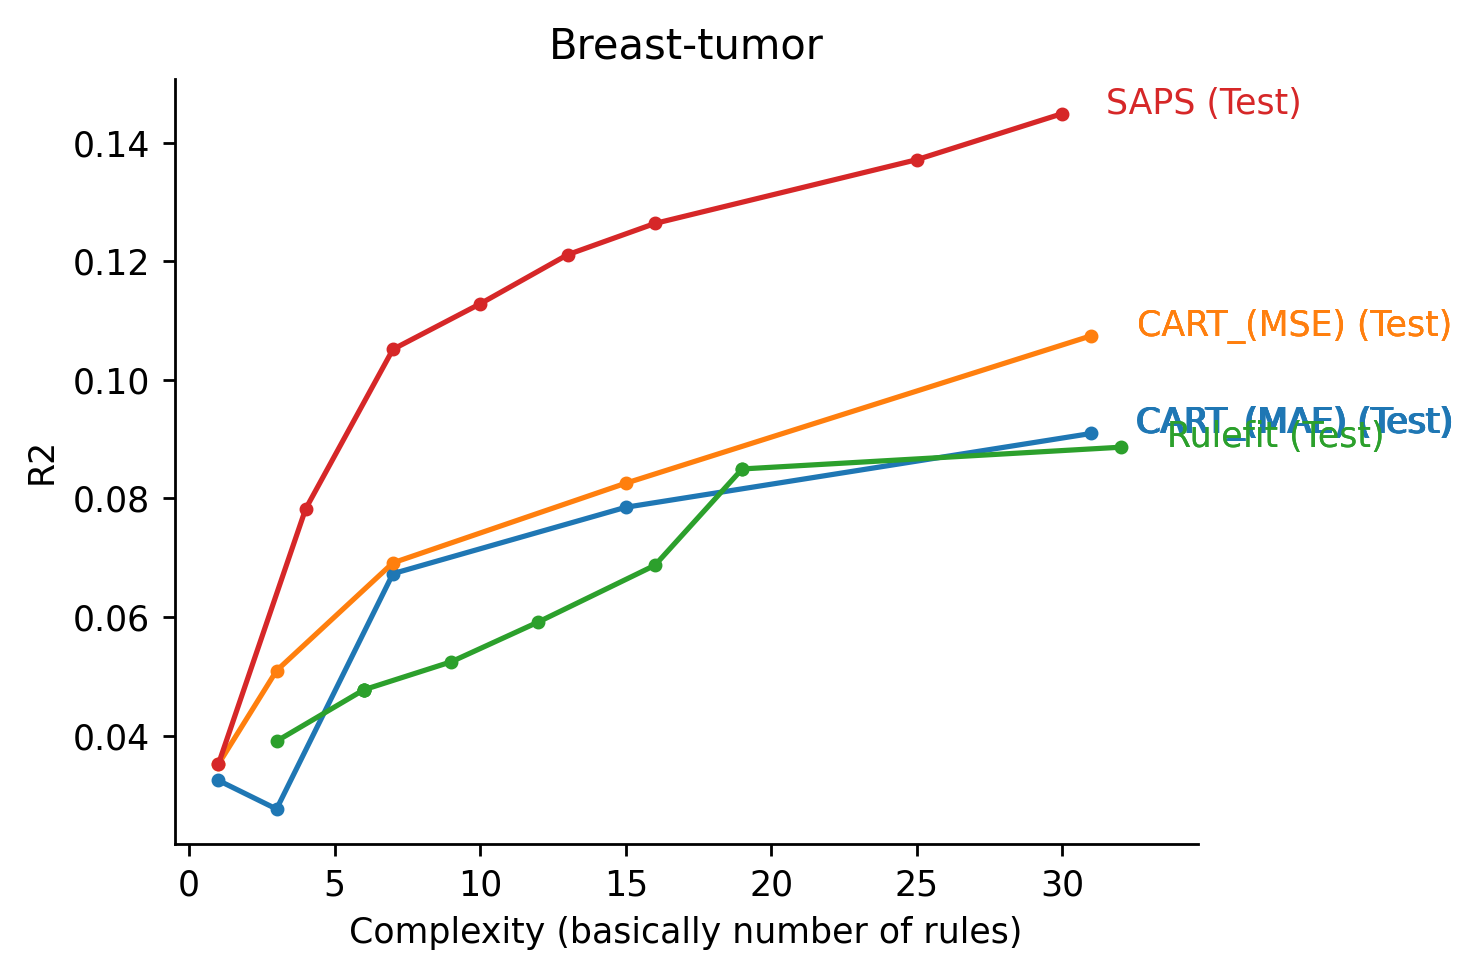

In [27]:
metric = 'r2'
for dset in DATASETS_REGRESSION:
    dset_name = dset[0]
    pkl_file = oj('results', 'saps', dset_name, 'train-test/combined.pkl')
    df = pkl.load(open(pkl_file, 'rb'))['df']
    df['model'] = df.index

    plt.figure(figsize=(6, 4))
    #     R, C = 1, 2
    for i, (name, g) in enumerate(df.groupby('model')):
        args = np.argsort(g[f'{dset_name}_complexity'])
        plt.title(dset_name.capitalize())
        kwargs = dict(color=colors[i])
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs,
                 label=name + ' (Test)')
#         plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs,
#                  label=name + ' (Train)')
        plt.xlabel('Complexity (basically number of rules)')
        #         plt.xlim((0, 25))
        plt.ylabel('R2')
        dvu.line_legend(fontsize=10, xoffset_spacing=0.05, adjust_text_labels=False)

In [62]:
df = pkl.load(open('results/saps/friedman1/train-test/results_aggregated.pkl', 'rb'))['df_mean']

In [63]:
df.keys()

Index(['max_depth', 'estimator', 'n_estimators', 'include_linear', 'max_rules',
       'posthoc_ridge', 'r2_train_mean', 'explained_variance_train_mean',
       'neg_mean_squared_error_train_mean', 'r2_test_mean',
       'explained_variance_test_mean', 'neg_mean_squared_error_test_mean',
       'complexity_mean', 'time_mean', 'r2_train_std',
       'explained_variance_train_std', 'neg_mean_squared_error_train_std',
       'r2_test_std', 'explained_variance_test_std',
       'neg_mean_squared_error_test_std', 'complexity_std', 'time_std'],
      dtype='object')

In [61]:
df

,max_depth,estimator,n_estimators,include_linear,max_rules,posthoc_ridge,r2_train,explained_variance_train,neg_mean_squared_error_train,r2_test,explained_variance_test,neg_mean_squared_error_test,complexity,time
0,-1.0,Rulefit,1.0,-1,-1.0,-1,0.446447,0.446447,11.521750,0.136424,0.167069,17.906700,3.0,0.014080
1,-1.0,Rulefit,2.0,-1,-1.0,-1,0.602454,0.602454,8.274593,0.354945,0.375617,13.375562,7.0,0.018603
2,-1.0,Rulefit,3.0,-1,-1.0,-1,0.615111,0.615111,8.011143,0.384079,0.399002,12.771441,8.0,0.021467
3,-1.0,Rulefit,4.0,-1,-1.0,-1,0.640167,0.640167,7.489630,0.419360,0.437982,12.039885,11.0,0.025333
4,-1.0,Rulefit,5.0,-1,-1.0,-1,0.640167,0.640167,7.489630,0.419359,0.437982,12.039893,11.0,0.036548
5,-1.0,Rulefit,6.0,-1,-1.0,-1,0.641410,0.641410,7.463753,0.395979,0.417849,12.524693,13.0,0.038644
6,-1.0,Rulefit,7.0,-1,-1.0,-1,0.641410,0.641410,7.463753,0.395979,0.417848,12.524701,13.0,0.044125
7,-1.0,Rulefit,8.0,-1,-1.0,-1,0.692713,0.692713,6.395932,0.491295,0.504937,10.548261,22.0,0.064618
8,-1.0,Rulefit,9.0,-1,-1.0,-1,0.705709,0.705709,6.125428,0.518001,0.531659,9.994496,23.0,0.076334
9,-1.0,Rulefit,10.0,-1,-1.0,-1,0.711114,0.711114,6.012924,0.509844,0.528705,10.163643,25.0,0.077390


In [64]:
df

,max_depth,estimator,n_estimators,include_linear,max_rules,posthoc_ridge,r2_train_mean,explained_variance_train_mean,neg_mean_squared_error_train_mean,r2_test_mean,...,complexity_mean,time_mean,r2_train_std,explained_variance_train_std,neg_mean_squared_error_train_std,r2_test_std,explained_variance_test_std,neg_mean_squared_error_test_std,complexity_std,time_std
0,-1.0,Rulefit,1.0,-1,-1.0,-1,0.446447,0.446447,11.521750,0.136424,...,3.0,0.014080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.0,Rulefit,2.0,-1,-1.0,-1,0.602454,0.602454,8.274593,0.354945,...,7.0,0.018603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.0,Rulefit,3.0,-1,-1.0,-1,0.615111,0.615111,8.011143,0.384079,...,8.0,0.021467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.0,Rulefit,4.0,-1,-1.0,-1,0.640167,0.640167,7.489630,0.419360,...,11.0,0.025333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.0,Rulefit,5.0,-1,-1.0,-1,0.640167,0.640167,7.489630,0.419359,...,11.0,0.036548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-1.0,Rulefit,6.0,-1,-1.0,-1,0.641410,0.641410,7.463753,0.395979,...,13.0,0.038644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-1.0,Rulefit,7.0,-1,-1.0,-1,0.641410,0.641410,7.463753,0.395979,...,13.0,0.044125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-1.0,Rulefit,8.0,-1,-1.0,-1,0.692713,0.692713,6.395932,0.491295,...,22.0,0.064618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-1.0,Rulefit,9.0,-1,-1.0,-1,0.705709,0.705709,6.125428,0.518001,...,23.0,0.076334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-1.0,Rulefit,10.0,-1,-1.0,-1,0.711114,0.711114,6.012924,0.509844,...,25.0,0.077390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
d = (
    df.fillna(-1)
    .groupby(['estimator', 'max_depth', 'n_estimators',
              'include_linear', 'max_rules', 'posthoc_ridge'])
    .mean()
)
d


r2_train  \
estimator             max_depth n_estimators include_linear max_rules posthoc_ridge             
CART_(MAE)             1.0      -1.0         -1             -1.0      -1             0.322052   
                       2.0      -1.0         -1             -1.0      -1             0.518502   
                       3.0      -1.0         -1             -1.0      -1             0.693746   
                       4.0      -1.0         -1             -1.0      -1             0.807054   
                       5.0      -1.0         -1             -1.0      -1             0.875127   
CART_(MSE)             1.0      -1.0         -1             -1.0      -1             0.332631   
                       2.0      -1.0         -1             -1.0      -1             0.555577   
                       3.0      -1.0         -1             -1.0      -1             0.722546   
                       4.0      -1.0         -1             -1.0      -1             0.819301   
                       5.0      -1.0         -1             -1.0      -1             0.892072   
Rulefit               -1.0       1.0         -1             -1.0      -1             0.423664   
                                 2.0         -1             -1.0      -1             0.528908   
                                 3.0         -1             -1.0      -1             0.573096   
                                 4.0         -1             -1.0      -1             0.606349   
                                 5.0         -1             -1.0      -1             0.625873   
                                 6.0         -1             -1.0      -1             0.655090   
                                 7.0         -1             -1.0      -1             0.670152   
                                 8.0         -1             -1.0      -1             0.698845   
                                 9.0         -1             -1.0      -1             0.703643   
                                 10.0        -1             -1.0      -1             0.705444   
                                 15.0        -1             -1.0      -1             0.731589   
SAPS                  -1.0      -1.0         -1              1.0      -1             0.332631   
                                                             4.0      -1             0.719136   
                                                             7.0      -1             0.818586   
                                                             10.0     -1             0.868927   
                                                             13.0     -1             0.903117   
                                                             16.0     -1             0.926108   
                                                             25.0     -1             0.963974   
                                                             30.0     -1             0.974842   
SAPS_(Include_Linear) -1.0      -1.0         True            1.0      -1            -0.605614   
                                                             4.0      -1             0.548970   
                                                             7.0      -1             0.759182   
                                                             10.0     -1             0.832765   
                                                             13.0     -1             0.882787   
                                                             16.0     -1             0.916078   
                                                             25.0     -1             0.961825   
                                                             30.0     -1             0.974472   
SAPS_(Reweighted)     -1.0      -1.0         -1              1.0      True           0.332604   
                                                             4.0      True           0.719356   
                                                             7.0      True           0.820135   
           